#  How to Wield the Working Model to Increase your Rankings.





**Determine the characteristics that places an individuals post agmonst the highest ranked**

The Hacker News community group provides an outlet for indivduals from different backgrounds in tech to communicate and share ideas. The premise of this model is supported by a voting system of 'upvotes' and 'downvotes'. Where each link is ranked on the main page based off its total votes.

In this project, the objective is to discuss two primary facets that may affect the chance an individual link may have of being ranked the highest. The solution to our question "Given the model provided by Hacker News and the data presented below, what factors and to what extent can each post be ranked and represented to the highest probable outcome. Specifically, only records that include 'Ask HN' or 'Show HN' will be of value for the extent of the exploration presented. 


**Import Hacker News Dataset**

Import the Hacker News dataset, this data is publicly available in the project folders. Approximately 20,000 records have been previously cleaned all of which require `num_comments` as a criteria. This field description can also be found inside the project folder README along with the other associated columns and their descriptions. We will begin by reading the data into our Notbook and seperating the data from the column headers.

In [ ]:
# Import reader from csv
from csv import reader

# Open the file and import the dataset as a list of list
open_file = open(r"C:\Users\Dell User\Documents\Hacker_News\HackerNews_posts_year_to_Sep_26_2016.csv", encoding='utf-8')
read_file = reader(open_file)
hn_hd = list(read_file)

# Extract the Headers from the list and create two separate list
hd = hn_hd[:1]
hn = hn_hd[1:]

**Filter the Data by Associated Titles**

Once the data has been properly divided, seperate the records corresponding to the type of post. As previously mentioned above, the only records which pertain to this analysis will be the posts that start with 'Ask HN' or 'Show HN' in   the title column. Lets begin by calculating the average number of comments for the two types of posts from the filtered   data. 

In [259]:
# List temporary variables
total_ask_comments = 0
total_show_comments = 0
total_other_comments = 0 

# Create an empty list to separate three different types of post
ask_post = []
show_post = []
other_post = []

# Loop through the original dataset - convert each title to a lowercase string and compare - calculate the average number of comments for each of the three types of post
for row in hn:
    title = row[1].lower()
    num_comment = int(row[4])
    if title.startswith('ask hn'):
        ask_post.append(row)
        total_ask_comments += num_comment
    elif title.startswith('show hn'):
        show_post.append(row)
        total_show_comments += num_comment
    else:
        other_post.append(row)
        total_other_comments += num_comment

# Calculate the average number of comments for each type of posting ('Ask HN' or 'Show HN')
average_num_ask_comments = total_ask_comments/len(ask_post)
average_num_show_comments = total_show_comments/len(show_post)

# Results
print("Ask HN - Average: " + str(round(average_num_ask_comments, 2)) + " - " + str(ask_post[0]))
print("\nShow HN - Average: " + str(round(average_num_show_comments, 2)) + " - " + str(show_post[0]))

Ask HN - Average: 10.39 - ['12578908', 'Ask HN: What TLD do you use for local development?', '', '4', '7', 'Sevrene', '9/26/2016 2:53']

Show HN - Average: 4.89 - ['12578335', 'Show HN: Finding puns computationally', 'http://puns.samueltaylor.org/', '2', '0', 'saamm', '9/26/2016 0:36']


**Explore Filterd Data and the Number of Comments**

Given the average for post that begin with 'Ask HN' being slightly greater than those that begin with 'Show HN.' Lets take a closer look into the distribution of all the posts and comments being considered. Consequently, in the next code block, well:

   * Extract the value from the `num_comments`column
   
   * Determine how frequent a post with certain number of comments appears
   
   * Sort that table
   
   * Display the total number for each type of post

In [265]:
# Create an empty list to store the number of comments for each 'Ask HN' post - Loop through original dataset and extract each value.
num_ask_comment = []
for i in ask_post:
    num_ask_comment.append(i[4])

# Create an empty list to store the number of comments for each 'Show HN' post - Loop through original dataset and extract each valu.
num_show_comment = []
for i in show_post:
    num_show_comment.append(i[4])

# Create an empty dictionary to store the frequency of each 'Ask HN'comment
ask_comment_dict = {}
for i in num_ask_comment:
    i = int(i)
    if i not in ask_comment_dict:
        ask_comment_dict[i] = 1
    else:
        ask_comment_dict[i] += 1
        
        
# Create an empty dictionary to store the frequency of each 'Show HN'comment     
show_comment_dict = {}
for i in num_show_comment:
    i = int(i)
    if i not in show_comment_dict:
        show_comment_dict[i] = 1
    else:
        show_comment_dict[i] += 1

        
# Function will print ascending dictionary if value is True or descending dictionary dictionary if value is False
def dict_order(value, dictionary):
    if value == True:
        asc_sort = list(dictionary.items())
        asc_sort.sort()
        asc_order = dict(asc_sort)
        dictionary = asc_order
    else:
        desc_sort = list(dictionary.items())
        desc_sort.sort(reverse = True)
        desc_order = dict(desc_sort)
        dictionary = desc_order
    return dictionary
 
# Results
total = len(ask_post) + len(show_post) + len(other_post) 
print("Number of post that Ask Hacker News: " + str(len(ask_post)))
print("Number of post that Show Hacker News: " + str(len(show_post)))

Number of post that Ask Hacker News: 9139
Number of post that Show Hacker News: 10158


   Lets use the functions and dictionaries above to explore the data. Immediately, it was apparent from our last set of results that there are more post that begin with 'Show HN'. One might conclude that this data alone gives proper representation to the fact that 'Show HN' postings often do better than 'Ask HN' which I believe is inherently false. Instead, its only safe to say that more people prefer to share their personal work as opposed to asking questions or 'text submissions.'

**Frequency - Number of Comments**

Lets create the distributions and visually open up the data to provide context. A requirement from Hacker News states that a total number of at least 100 comments is necessary for one to reach the top of the website's board. So, lets keep that in mind in our discovery.  Below we will create a dictionary of ranges to determine what ranges of post produce a certain number of comments. 

In [279]:
# Import pandas dataframe package
import pandas as pd

# Sort dictionary in ascending order
sort_swap_ask_comment_dict = dict_order(True, ask_comment_dict)
sort_swap_show_comment_dict = dict_order(True, show_comment_dict)

# For each type of Post, convert to a python list
num_comments_list_ask = list(sort_swap_ask_comment_dict.keys())
num_post_list_ask = list(sort_swap_ask_comment_dict.values())

num_comments_list_show = list(sort_swap_show_comment_dict.keys())
num_post_list_show = list(sort_swap_show_comment_dict.values())


# Convert the frequency table into pandas and display the results as a dataframe
print("Ask HN")
pd.DataFrame(data = {'Number of Comments': num_comments_list_ask, 'Number of Posts': num_post_list_ask})

Ask HN


,Number of Comments,Number of Posts
0,0,2228
1,1,1388
2,2,1243
3,3,766
4,4,595
...,...,...
204,898,1
205,910,1
206,937,1
207,947,1


In [276]:
print("Show HN")
pd.DataFrame(data = {'Number of Comments': num_comments_list_show, 'Number of Posts': num_post_list_show})

Show HN


,Number of Comments,Number of Posts
0,0,5099
1,1,1748
2,2,816
3,3,506
4,4,301
...,...,...
138,250,1
139,257,1
140,280,1
141,298,1


**Define Overall Percentages**  

In [280]:
# Calculate the percentage of 'Ask HN', 'Show HN' and 'Other' posts
ask_per = len(ask_post)/total * 100
show_per = len(show_post)/total * 100

new_total = len(ask_post) + len(show_post)
ask_per_2 = len(ask_post)/new_total * 100
show_per_2 = len(show_post)/new_total * 100
    
# Display Results
print("Ask HN - " + str(ask_per_2))
print("Show HN - " + str(show_per_2))

Ask HN - 47.35969321656216
Show HN - 52.64030678343784


Respectively, the percentages for 'Ask HN' or 'Show HN'  are 47.36% and 52.64%. The difference between the two post are relatively the same. Lets continue the exploration based on the criteria mentioned above now to help further assist a particular distinction between the two types of post. Well begin looking for which type of post succeeds the other where there is a limit of at least a 100 comments available.  

In [289]:
# Count the percentage of 'Ask HN'and 'Show HN' posts available with more than 100 comments
count_ask = 0
dict_keys = ask_comment_dict.keys()
for item in dict_keys:
    if item >= 100:
        count_ask += ask_comment_dict[item]

count_show = 0
dict_keys = show_comment_dict.keys()
for item in dict_keys:
    if item >= 100:
        count_show += show_comment_dict[item]

# Count the total number of 'Ask HN' and 'Show HN' post to determine percentage of posts greater than 100 comments
total_ask_post = 0
for i in ask_comment_dict.values():
    total_ask_post += i

total_show_post = 0
for i in show_comment_dict.values():
    total_show_post += i

# Calculate the percentages of both types of post with at least 100 commments
per_greater_100_ask = count_ask/total_ask_post 
print("Ask HN: " + "{:.2%}".format(per_greater_100_ask))
 
per_greater_100_show = count_show/total_show_post 
print("Show HN: " + "{:.2%}".format(per_greater_100_show))

Ask HN: 1.58%
Show HN: 0.58%


Provided 'Ask HN' post have a higher percentage of posts with at least 100 comments. The chances of one receiving a certain amount of activity is slightly better if that post is posing a question rather than looking to share information on the website.

**Explore Time Related Data**

Given the low percentages, one might conclude that the type of posts alone that make it to the top of the page is not a considerable factor in ranking very high. Consider another factor in the dataset; lets look at the `created_at` column. We will begin by extracting the time that each post was created at and seperating the data. 


In [288]:
# Import datatime library
import datetime as dt

# reate an empty list to store the number of comments and datetime
result_list_ask = []
result_list_show = []

# oop through the 'Ask HN' and 'Show HN' list and append the datetime and the number of comments to an empty list
for i in ask_post:
    start_time = i[6]
    comment_num = i[4]
    result_list_ask.append([comment_num, start_time])
    
for i in show_post:
    start_time = i[6]
    comment_num = i[4]
    result_list_show.append([comment_num, start_time])

In this portion of my exploration, I will look for patterns in the data that will allow me to form a conclusion around the best and worst times to post on the website. Lets begin by importing the datetime library to preform our analysis. Following the first step I will will calculate the amount of post created in each hour of the day, along with the number of comments. To finish, I want to find the average number of comments received every hour.


In [294]:
# Create an empty dictionary to store the number of comments and counts by hour
count_hour_ask = {}
comment_hour_ask = {}
count_hour_show = {}
comment_hour_show = {}

# Extract the date and time and create a time object - Ask Posts
for i in result_list_ask:
    datetime_ask = i[1]
    comment_ask = int(i[0])
    datetime_ask = datetime_ask.split()
    time_ask_obj = dt.datetime.strptime(datetime_ask[1], "%H:%M")
    hr_ask_obj = dt.datetime.strftime(time_ask_obj, "%H")
    
    # Add count to designated times - Ask
    if hr_ask_obj in count_hour_ask:
        count_hour_ask[hr_ask_obj] += 1
        comment_hour_ask[hr_ask_obj] += comment_ask
    else:
        count_hour_ask[hr_ask_obj] = 1
        comment_hour_ask[hr_ask_obj] = comment_ask
        
# Extract the date and time and create a time object - Ask Posts   
for i in result_list_show:
    datetime_show = i[1]
    comment_show = int(i[0])
    datetime_show = datetime_show.split()
    time_show_obj = dt.datetime.strptime(datetime_show[1], "%H:%M")  
    hr_show_obj = dt.datetime.strftime(time_show_obj, "%H")
    
    # Add count to designated times - Show
    if hr_show_obj in count_hour_show:
        count_hour_show[hr_show_obj] += 1
        comment_hour_show[hr_show_obj] += comment_show
    else:
        count_hour_show[hr_show_obj] = 1
        comment_hour_show[hr_show_obj] = comment_show

Below well take a look at the different variations in time. For both types of posts, lets see the results for each hour. Over the course of the day, the comments tend to gradually increase in size until 15:00, approximately 3:00pm. After that point in time the data states that the activity begins to decrease in size. At a rate close to which the activity increases. Lets conclude that majority of the activity is optimal around plus or minus 2 - 3 hours from 3:00pm.

In [281]:
# Display Results
print("Ask - Counts by the Hour\n")
print(dict_order(True, count_hour_ask))
print("\nShow - Counts by the Hour\n")
print(dict_order(True, count_hour_show))

Ask - Counts by the Hour

{'00': 301, '01': 282, '02': 269, '03': 271, '04': 243, '05': 209, '06': 234, '07': 226, '08': 257, '09': 222, '10': 282, '11': 312, '12': 342, '13': 444, '14': 513, '15': 646, '16': 579, '17': 587, '18': 614, '19': 552, '20': 510, '21': 518, '22': 383, '23': 343}

Show - Counts by the Hour

{'00': 276, '01': 247, '02': 209, '03': 206, '04': 194, '05': 172, '06': 192, '07': 236, '08': 316, '09': 302, '10': 323, '11': 402, '12': 516, '13': 610, '14': 696, '15': 836, '16': 801, '17': 761, '18': 656, '19': 556, '20': 525, '21': 430, '22': 377, '23': 319}


Below well display the total number of comments within each hour. From this data we can can conluded possibly the best and worst times to post based on the comment activity or we can conclude an expected time frame of when most people engage within the site. Similar to the counts by hour, alot of the activity begins in the later part of the afternoon. Unlike the counts data, that same activity remains relatively high througout the evening and into the night. 

In [295]:
# Display Results
print("Ask - Comments by the Hour\n")
print(dict_order(True, comment_hour_ask))
print("\nShow - Comments by the Hour\n")
print(dict_order(True, comment_hour_show))

Ask - Comments by the Hour

{'00': 2277, '01': 2089, '02': 2996, '03': 2154, '04': 2360, '05': 1838, '06': 1587, '07': 1585, '08': 2362, '09': 1477, '10': 3013, '11': 2797, '12': 4234, '13': 7245, '14': 4972, '15': 18525, '16': 4466, '17': 5547, '18': 4877, '19': 3954, '20': 4462, '21': 4500, '22': 3372, '23': 2297}

Show - Comments by the Hour

{'00': 1283, '01': 1006, '02': 1076, '03': 934, '04': 978, '05': 592, '06': 904, '07': 1577, '08': 1771, '09': 1411, '10': 1228, '11': 2413, '12': 3609, '13': 3314, '14': 3839, '15': 3824, '16': 3769, '17': 3236, '18': 3242, '19': 2791, '20': 2183, '21': 1759, '22': 1450, '23': 1444}


After all four distributions have been created lets convert each one and graph for further analysis. Apart of our analysis will consist of looking at the data displayed individually and furthermore, the data will be used to be compared with one another.  Below you will find each graph representing the data: 

 1. Ask Post Counts by the Hour
 2. Show Post Counts by the Hour
 3. Ask Post Comments by the Hour
 4. Show Post Comments by the Hour
    

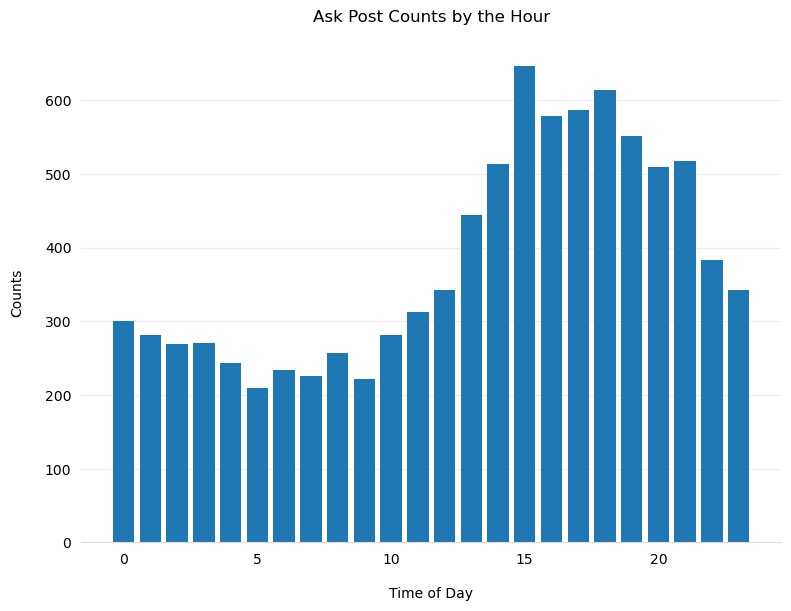

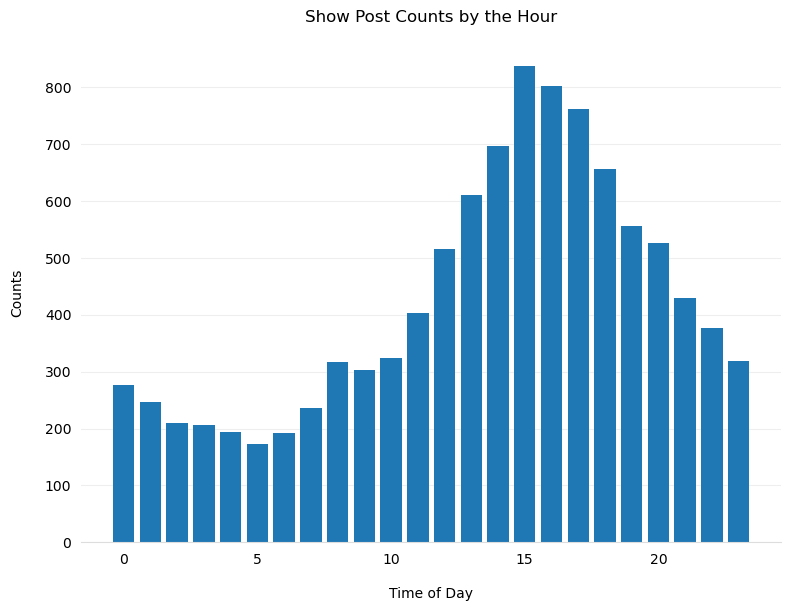

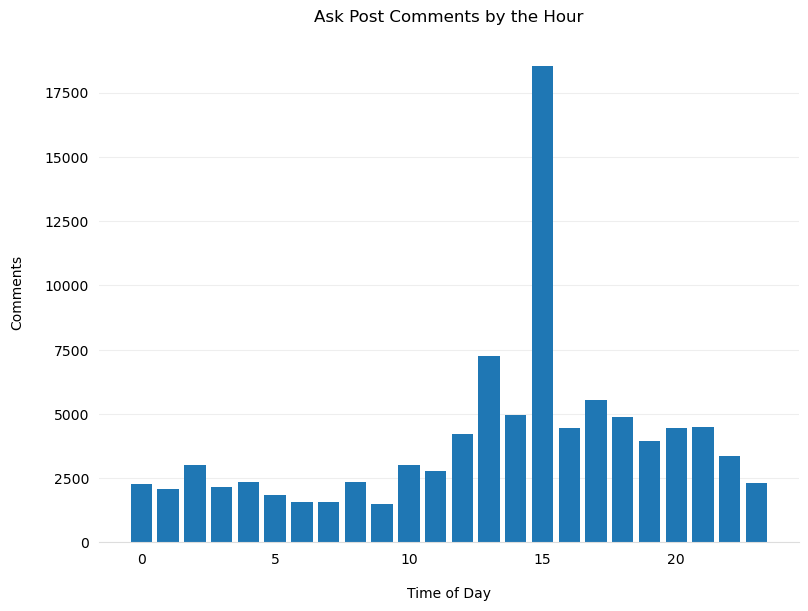

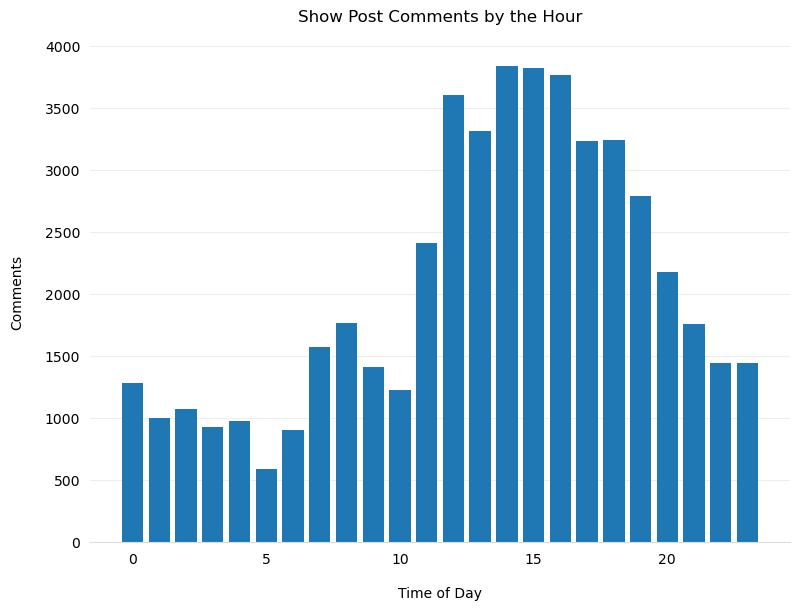

In [303]:
# Import Matplotlib Library
import matplotlib.pyplot as plt

# Function creates a bar graph representing the data for the four different types of data   
def compare_times(dictionary, graph):
    val = []
    times = []
    
    # Extract keys and values from dictionary and append to separate list
    for i in dict_order(True, dictionary):
        temp_dict = dict_order(True, dictionary)
        val.append(temp_dict[i])
        times.append(int(i))

    # Plot figure
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(times, val)

    # Asix styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    # Decision map for proper graph labeling
    if graph == 'count_hour_ask':
        ax.set_xlabel('Time of Day', labelpad=15)
        ax.set_ylabel('Counts', labelpad=15)
        ax.set_title('Ask Post Counts by the Hour', pad=15)
    elif graph == 'count_hour_show':
        ax.set_xlabel('Time of Day', labelpad=15)
        ax.set_ylabel('Counts', labelpad=15)
        ax.set_title('Show Post Counts by the Hour', pad=15)
    elif graph == 'comment_hour_ask':
        ax.set_xlabel('Time of Day', labelpad=15)
        ax.set_ylabel('Comments', labelpad=15)
        ax.set_title('Ask Post Comments by the Hour', pad=15)
    elif graph == 'comment_hour_show':
        ax.set_xlabel('Time of Day', labelpad=15)
        ax.set_ylabel('Comments', labelpad=15)
        ax.set_title('Show Post Comments by the Hour', pad=15)
    else:
        print("Inccorrect graph. Choose another.")
    
    
# Call function - for each graph
compare_times(count_hour_ask, 'count_hour_ask')
compare_times(count_hour_show, 'count_hour_show')
compare_times(comment_hour_ask, 'comment_hour_ask')
compare_times(comment_hour_show, 'comment_hour_show')



Next well use the two distributions for each type of posts, 'Ask' and 'Show' and calculate the average number of comments created during each hour of the day. From this point the data we will be comparing is the comments per hour divided by the actual counts per hour. By capturing the average number of comments every hour we can focus on some of the top times during the day to reccomend sharing a post. 

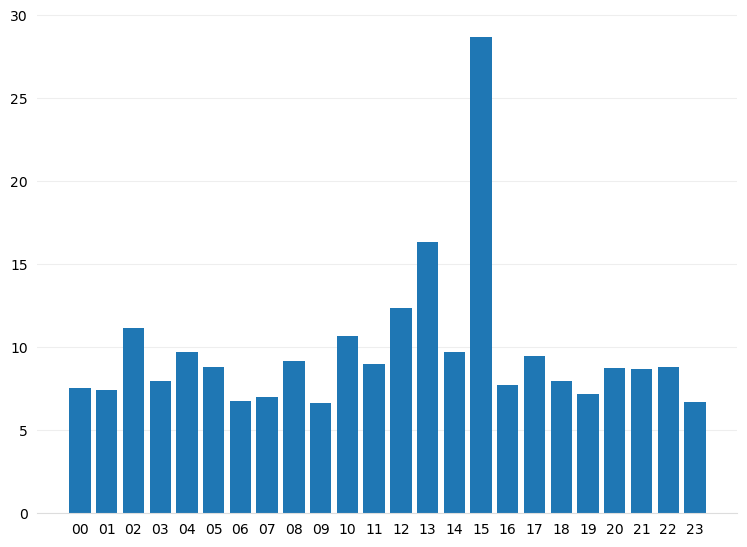

In [305]:
# Convert dictionary to ascending order and assign to a variable
a1 = dict_order(True, comment_hour_ask)
a2 = dict_order(True, count_hour_ask)

# Create empty list to assign the times and the averages
average_by_hour_ask = []

#Loop through both dictionaries and calculate the average
for i in a1:
    if i in a2:
        average_by_hour_ask.append([i, a1[i] / a2[i]])

# Create empty list
times_key = []
times_value = []

# Loop through list of list averages and extract keys and values
for i in average_by_hour_ask:
    times_key.append(i[0])
    times_value.append(i[1])

# Plot figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(times_key, times_value)

# Asix styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

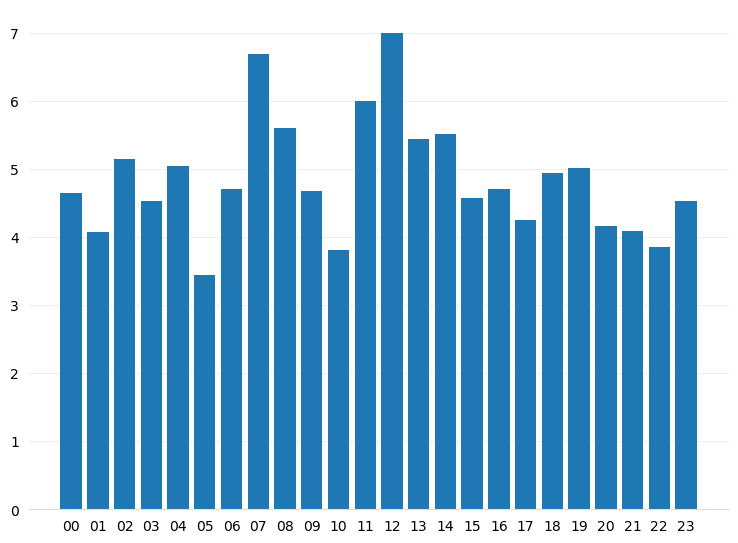

In [306]:
# Convert dictionary to ascending order and assign to a variable
a3 = dict_order(True, comment_hour_show)
a4 = dict_order(True, count_hour_show)

# Create empty list to assign the times and the averages
average_by_hour_show = []

#Loop through both dictionaries and calculate the average
for i in a3:
    if i in a4:
        average_by_hour_show.append([i, a3[i] / a4[i]])

# Create empty list
times_key2 = []
times_value2 = []

# Loop through list of list averages and extract keys and values
for i in average_by_hour_show:
    times_key2.append(i[0])
    times_value2.append(i[1])

# Plot figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(times_key2, times_value2)

# Asix styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

According to the data above we can conclude that the Top 5 times for 'Ask' post are between 2 to 3am, 10 to 11am, 12 to 1pm, 1 to 2pm and 3 to 4pm, and for all 'Show' post the best times are between 7 to 8 am, 8 to 9am, 11 to 12 pm, 12 to 1 pm, 2 to 3 pm. From here we wcan conclude all of our findings throughout the report to form a conclusion about the data.

# **Conclusion**

The result of this project is to provide substantial data that supports individuals who are looking to gain a more desired output from their post on HackerNews. HackerNews has a working model which they use to determine the value of each post and subsequently the ranking system in place grants front page placement to those post who do well as far as its activity. As the title states we will help users find the most optimal method of increasing their activity on the website which indeed becomes beneficial for everyone.
    
    
**Related to the Comments**

Lets begin with the comments; the first statical measurement that was captured was the going average per link. If you are looking to pose a question, the average number of comments was approximately 10 comments. While if you are looking to post information in the form of a statement, you will find the median number of comments is approximately 5 comments. Given the total percentage of each type of post is close in value, 47.36% for 'Ask HN' and 52.64% for 'Show HN'. Lets generally state that even though 'Ask HN' post consist of a smaller portion of the sample, that the activity of end users are typically more involved in the form of posing questions and looking for answers. 
    
Given those values are somewhat vague and leave wide range of uncertainity present. We conducted a few frequency tables so that the number of post with at least 100 comments could be recorded and evaluated. The data is consistent in the sense that 'Ask HN' type post statistically have a far better return on their comments. 
    
**Time Related**

The second method to be evaluated is based on timing. The data has been seperated by the hour. We chose to extract the number of comments as well. Doing so, provided four distributions. This includes the number of comments per hour and total number of individual post per hour. The activity between the two types of posts share the same distribution throughout the day. As far as the number of comments are concerened, providing the substantial gap between the two types of posts, the averages were calculated. That calculated value indicates post containing 'Ask HN' do better on the website.
    
**Decision**

Based on this understanding I believe if your looking to provide value, "Show HN", this type of action should be carried out at specific times of the day. The numbers arent in favor of these types of post, so timing is critical. Peek times are during the beginning of the work day/early morning and noon. This indidicates that highest percentage of individuals choose to engage with the website typically before or in between there work days.

Those post that are in the form of a question are slightly different. Individuals who choose to share engage at a much higher rate. These types of post are slightly more effective at being ranked closer to the front page. This is good news because people want to engage, the question is what time would give me the best chance of receiving the response or information one is looking for. The distribution for this answer states 3pm plus or minus an hour or two would give the typical 'Ask HN' type question the best chance to receive a proper set of responses.
    
    